In [92]:
import pandas as pd
import numpy as np

In [93]:
df=pd.read_csv('/home/mellibia/Downloads/datasets_2021_5514_cereal.csv')

In [94]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


In [96]:
df.describe()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [97]:
import seaborn as sns

In [98]:
labels=[df.columns]
df['type'].unique()

array(['C', 'H'], dtype=object)

In [99]:
print(labels)

[Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')]


In [100]:
for i in labels:
    print(df[i].isnull().sum())
    

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [101]:
df['sugars'].isnull().sum()

0

In [102]:
import matplotlib.pyplot as plt

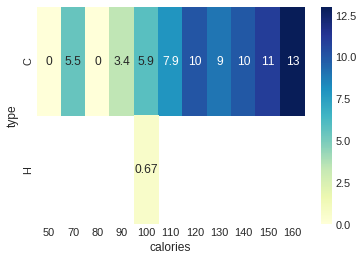

In [103]:
# pandas pivot
heatmap1_data = pd.pivot_table(df, values='sugars',index=['type'],columns='calories')
sns.heatmap(heatmap1_data, cmap="YlGnBu",annot=True)

In [104]:
df['sugars'].unique()

array([ 6,  8,  5,  0, 10, 14, 12,  1,  9,  7, 13,  3,  2, 11, 15,  4, -1])

In [105]:
df['type'].unique()

array(['C', 'H'], dtype=object)

In [106]:
df['calories'].unique()

array([ 70, 120,  50, 110, 130,  90, 100, 140, 150, 160,  80])

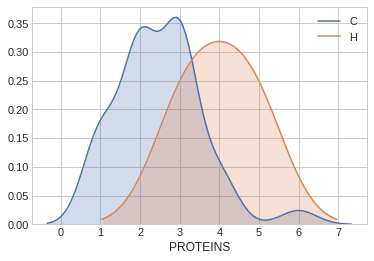

In [107]:
sns.kdeplot(df.protein[df.type=='C'], label='C', shade=True)
sns.kdeplot(df.protein[df.type=='H'], label='H', shade=True)
plt.xlabel('PROTEINS');

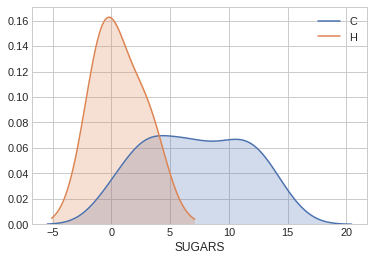

In [108]:
sns.kdeplot(df.sugars[df.type=='C'], label='C', shade=True)
sns.kdeplot(df.sugars[df.type=='H'], label='H', shade=True)
plt.xlabel('SUGARS');

In [109]:
##Categotrical Manufacturing 

In [110]:
df.mfr.count()

77

In [111]:
##Know the numbers of each type
def _nrotypes(inputlist):
    j={}
    for i in inputlist:
        if not i in j.keys():
            j[i]=1
        else:
            j[i]+=1
    return j
print(_nrotypes(df['mfr']))

{'N': 6, 'Q': 8, 'K': 23, 'R': 8, 'G': 22, 'P': 9, 'A': 1}


In [112]:
# Let us find out - How many 'shelf' cereals are placed on

In [113]:
df.shelf.count()

77

In [114]:
df['shelf'].nunique()

3

In [115]:
##there is three types 
df['shelf'].unique()

array([3, 1, 2])

In [116]:
##nNRO
print(_nrotypes(df['shelf']))

{3: 36, 1: 20, 2: 21}


In [117]:
dummies=pd.get_dummies(df.type)
dummies.head(2)

,C,H
0,1,0
1,1,0


In [118]:
merged=pd.concat([df,dummies],axis='columns')
merged.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,C,H
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,1,0


In [119]:
final=merged.drop(['type','H'],axis='columns')
final.head(3)

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,C
0,100% Bran,N,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1
1,100% Natural Bran,Q,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,1
2,All-Bran,K,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,1


In [120]:
final.columns

Index(['name', 'mfr', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'C'],
      dtype='object')

In [121]:
import seaborn as sns
sns.set(style="whitegrid")

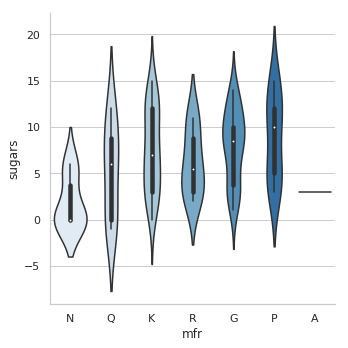

In [122]:
g = sns.catplot(x = "mfr", y = "sugars", palette = "Blues", data=df, kind="violin")

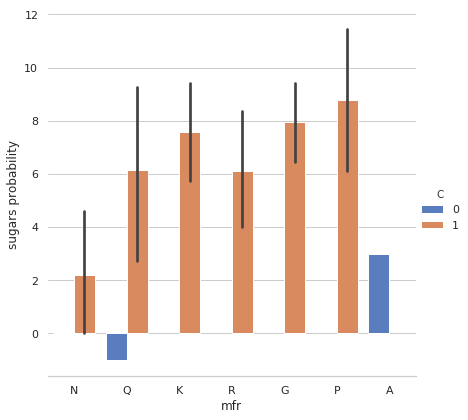

In [123]:
g = sns.catplot(x="mfr", y="sugars", hue="C", data=final,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("sugars probability")

In [124]:
final.C[final.mfr=='A'].unique()

array([0], dtype=uint64)

In [125]:
shelf_counts =df['shelf'].value_counts()
shelf_counts

3    36
2    21
1    20
Name: shelf, dtype: int64

In [126]:
types_counts=df['type'].value_counts()
types_counts

C    74
H     3
Name: type, dtype: int64

In [127]:
mrf_counts=df['mfr'].value_counts()
mrf_counts

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

In [128]:
plt.style.use('seaborn-whitegrid')

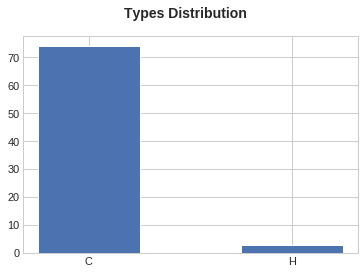

In [129]:
fig, ax = plt.subplots()
ax.bar(types_counts.index.values, types_counts.values, width=0.5, align='center')
fig.suptitle('Types Distribution', fontsize=14, fontweight='bold');

Text(0.5,0.98,'shelf Distribution')

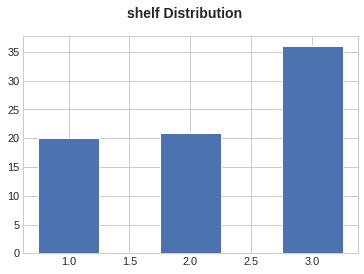

In [130]:
fig1,ax1=plt.subplots()
ax1.bar(shelf_counts.index.values,shelf_counts.values,align='center',width=0.5)
fig1.suptitle('shelf Distribution',fontsize=14,fontweight='bold')

Text(0.5,0.98,'Mfr Distribution')

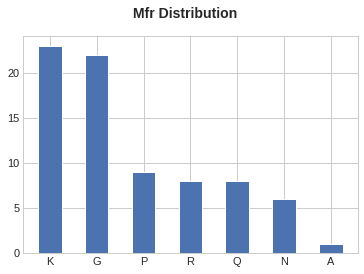

In [131]:
fig2,ax2=plt.subplots()
ax2.bar(mrf_counts.index.values,mrf_counts.values,align='center',width=0.5)
fig2.suptitle('Mfr Distribution',fontsize=14,fontweight='bold')

In [132]:
types_counts.index.values

array(['C', 'H'], dtype=object)

In [133]:
mrf_counts.values

array([23, 22,  9,  8,  8,  6,  1])

In [134]:
shelf_counts.values

array([36, 21, 20])

In [135]:
num_rows = df['name'].count()
print(num_rows)

77


In [136]:
rel_freq_type = types_counts.values/num_rows
print(rel_freq_type)

rel_freq_mfr = mrf_counts.values/num_rows
print(rel_freq_mfr)

rel_freq_shelf = shelf_counts.values/num_rows
print(rel_freq_shelf)


[0.96103896 0.03896104]
[0.2987013  0.28571429 0.11688312 0.1038961  0.1038961  0.07792208
 0.01298701]
[0.46753247 0.27272727 0.25974026]


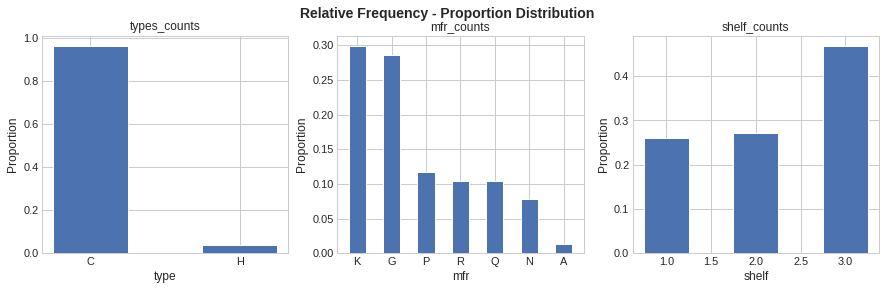

In [137]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax0.bar(types_counts.index.values, rel_freq_type, width=0.5, align='center')
ax0.set(title = 'types_counts', xlabel='type' , ylabel = 'Proportion')

ax1.bar(mrf_counts.index.values, rel_freq_mfr, width=0.5, align='center')
ax1.set(title = 'mfr_counts', xlabel='mfr' , ylabel = 'Proportion')

ax2.bar(shelf_counts.index.values, rel_freq_shelf, width=0.5, align='center')
ax2.set(title = 'shelf_counts', xlabel='shelf' , ylabel = 'Proportion')

fig.suptitle('Relative Frequency - Proportion Distribution', fontsize=14, fontweight='bold');

In [138]:
num_rows = df['name'].count()

percent_freq_type = (types_counts.values/num_rows)*100
print(percent_freq_type)

percent_freq_mfr = (mrf_counts.values/num_rows)*100
print(percent_freq_mfr)

percent_freq_shelf = (shelf_counts.values/num_rows)*100
print(percent_freq_shelf)


[96.1038961  3.8961039]
[29.87012987 28.57142857 11.68831169 10.38961039 10.38961039  7.79220779
  1.2987013 ]
[46.75324675 27.27272727 25.97402597]


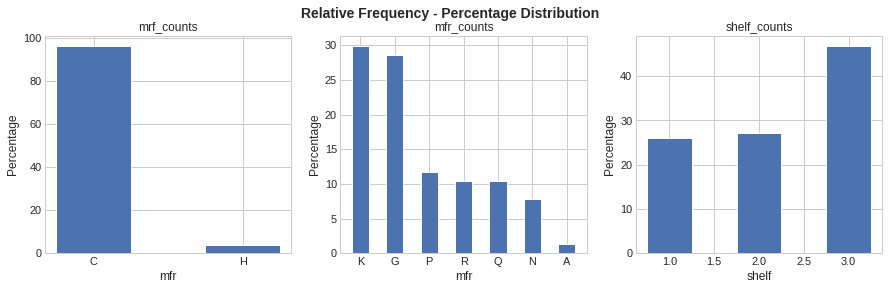

In [139]:

plt.style.use('seaborn-whitegrid')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax0.bar(types_counts.index.values,percent_freq_type,width=0.5,align='center')
ax0.set(title='mrf_counts',xlabel='mfr',ylabel='Percentage')

ax1.bar(mrf_counts.index.values,percent_freq_mfr, width=0.5, align='center')
ax1.set(title = 'mfr_counts', xlabel='mfr' , ylabel = 'Percentage')

ax2.bar(shelf_counts.index.values,percent_freq_shelf, width=0.5, align='center')
ax2.set(title = 'shelf_counts', xlabel='shelf' , ylabel = 'Percentage')

# Title the figure
fig.suptitle('Relative Frequency - Percentage Distribution', fontsize=14, fontweight='bold');

In [150]:
group_mfr_shelf = df.groupby(['mfr','shelf'])['name']  
group_mfr_shelf.count()

mfr  shelf
A    2         1
G    1         6
     2         7
     3         9
K    1         4
     2         7
     3        12
N    1         3
     2         2
     3         1
P    1         2
     2         1
     3         6
Q    1         1
     2         3
     3         4
R    1         4
     3         4
Name: name, dtype: int64